In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing import image
img_path = '/content/drive/My Drive/transfer_learning/TL_Mechanism/images/lion.jpg'

In [32]:
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load an image using PIL
img = Image.open(img_path)

# Convert the image to a NumPy array
img_arr = image.img_to_array(img)
print(img_arr.shape)

(325, 328, 3)


In [35]:
# Resize the image to (224, 224)
img_resized = img.resize((224, 224))

# Convert the resized image to a NumPy array
img_arr = image.img_to_array(img_resized)

# Print the shape of the resulting array
print(img_arr.shape)

(224, 224, 3)


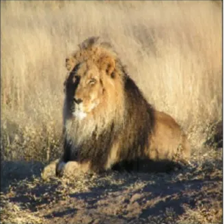

In [25]:
img_resized

In [26]:
import numpy as np
image_dim = np.expand_dims(img_arr, axis=0)
print(image_dim.shape)

(1, 224, 224, 3)


In [36]:
from keras.applications.resnet50 import preprocess_input
image_dim_proc = preprocess_input(image_dim)

In [37]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [39]:
preds = model.predict(image_dim_proc)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.68988914e-13, 4.79483600e-14, 2.90007016e-12, 4.83581979e-13,
        6.25702222e-14, 8.59497206e-13, 1.01976348e-12, 2.55621274e-10,
        3.95845821e-11, 9.91681737e-10, 4.73375852e-12, 6.41811604e-12,
        3.46574310e-12, 3.06462147e-12, 1.61721290e-13, 1.32411646e-13,
        9.22137475e-13, 1.36328069e-12, 9.99717236e-13, 1.51036746e-12,
        8.31903665e-13, 3.26106711e-11, 1.54715699e-10, 8.20922410e-12,
        2.13549599e-12, 1.04842827e-12, 7.83150021e-13, 7.21918944e-13,
        1.01449394e-13, 6.50646258e-13, 2.85053638e-13, 1.56788401e-13,
        1.69054441e-12, 3.36803090e-12, 3.93970013e-12, 9.27407890e-13,
        3.78230162e-13, 1.18024134e-13, 3.53948186e-12, 1.88182781e-12,
        4.03160815e-14, 7.68755827e-13, 1.11555025e-12, 3.26680266e-10,
        5.75952697e-13, 1.41267588e-11, 2.31387446e-13, 5.32190828e-13,
        1.09669010e-11, 3.65696917e-11, 1.22043136e-13, 1.78015708e-12,
        5.30459227e-12, 3.31166843e-12, 2.79020990e-12, 3.876297

In [42]:
from keras.applications.resnet50 import decode_predictions
decoded_pred = decode_predictions(preds, top=3)
decoded_pred

[[('n02129165', 'lion', 0.99999034),
  ('n02106030', 'collie', 4.291209e-06),
  ('n02129604', 'tiger', 1.6201332e-06)]]

In [43]:
for p in decoded_pred[0]:
  print(p[1], ": ", round(p[2]*100,2))

lion :  100.0
collie :  0.0
tiger :  0.0


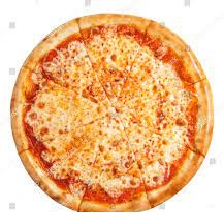

In [45]:
from keras.preprocessing import image
img2_path = '/content/drive/My Drive/transfer_learning/TL_Mechanism/images/pizza.jpg'
target_size=(224, 224)
img2 = image.load_img(img2_path, target_size=target_size)
img2

In [46]:
img_arr = image.img_to_array(img2)
img_arr_dim = np.expand_dims(img_arr, axis=0)
img_arr_dim_proc = preprocess_input(img_arr_dim)
preds = model.predict(img_arr_dim_proc)
decoded_pred=decode_predictions(preds, top=3)
for p in decoded_pred[0]:
    print(p[1] ,": ", round(p[2]*100,2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
pizza :  85.51
potpie :  11.14
eggnog :  0.81


In [ ]:
path =''
t_size = (224,224)
image = image.load_img(path, target_size=t_size)
image